In [1]:
import os
import networkx as nx
from src.utils.utils_features import NetworkFeatureComputation
from src.utils.utils_networks import godfhater_index, favor_centrality
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    output_filepath
except:
    output_filepath = '../data/processed/'

In [3]:

def compute_std(tol, year = '2015', graph = 'A_country.graphml', centrality = 'favor'):
    network_path = os.path.join(output_filepath, year, graph)
    G = nx.readwrite.graphml.read_graphml(network_path)

    if centrality == 'gfi':
        cent_dict  = godfhater_index(G,tol=tol)
        all_values = list(cent_dict.values())
    elif centrality == 'favor':
        cent_dict  = favor_centrality(G,tol=tol)
        all_values = list(cent_dict.values())

    return np.std(all_values)

def plot_dinamic_range(graph = 'A_country.graphml', n=9, centrality='favor'):
        
    tols =  np.logspace(-n,-n+8,9)
    stds = [[compute_std(tol, str(y), graph, centrality) for tol in tols] for y in range(2005, 2016)]

    df = pd.DataFrame(np.array(stds).T, index=tols, columns = range(2005, 2016))
    df = df.stack().reset_index()
    df.columns = ['tol', 'year', 'std']

    fig, ax = plt.subplots(figsize = (8,5))

    sns.boxplot(x='tol', y='std', data=df, ax=ax)
    ax.set_xlabel('$\epsilon$')
    ax.set_ylabel('$\sigma$(favor capital)')

    if graph == 'A_country.graphml':
        ax.set_title(f'Financial {centrality} capital dinamic range for different $\epsilon$')
    else:
        ax.set_title(f'Migration {centrality} capital dinamic range for different $\epsilon$')

    plt.show()

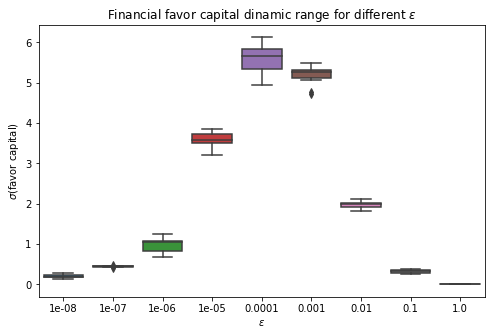

In [4]:
plot_dinamic_range('A_country.graphml', n=8, centrality='favor')

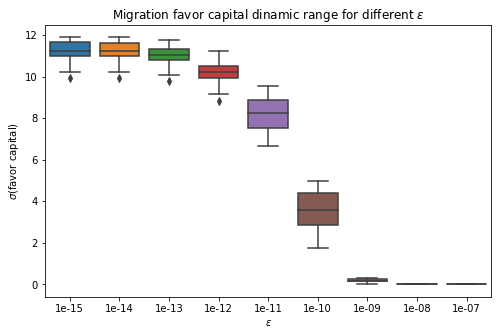

In [5]:
plot_dinamic_range('migration_network.graphml', n=15, centrality='favor')